<a href="https://colab.research.google.com/github/A01793509/Equipo38/blob/main/Semana9_Actividad_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
###Profesora: María de la Paz Rico Fernández

## **Actividad de la Semana 9**
###**Limpieza, análisis, visualización y kmeans**


**Nombres y matrículas de los integrantes del equipo:**


   **Equipo 93**

*   Omar Nayib García Sabag - A01793008
*   Marco Antonio Vázquez Morales (A01793704)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import requests, zipfile
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

##**Limpieza de datos**

In [ ]:
 !wget = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

--2022-11-15 05:34:56--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2022-11-15 05:34:56--  http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
Connecting to 201.116.60.46:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2556825 (2.4M) [application/x-zip-compressed]
Saving to: ‘Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.2’

Datos_de_calidad_de 100%[===================>]   2.44M  1.88MB/s    in 1.3s    

2022-11-15 05:34:57 (1.88 MB/s) - ‘Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.2’ saved [2556825/2556825]

FINISHED --2022-11-15 05:34:57--
Total wall clock time: 1.5s
Downloaded: 1 files, 2.4M in 1.3s (1.88 MB/s)


In [ ]:
!unzip /content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip

Archive:  /content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
replace Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!ls

Datos_de_calidad_del_agua_2020
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.1
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.2
sample_data


In [ ]:
df = pd.read_csv("Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv",  encoding = 'latin1')  

In [ ]:
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
df.isna().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [ ]:
df = df.drop(['CONTAMINANTES', 'SDT_mg/L', 'PERIODO'], axis=1)
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
df["CALIDAD_CONDUC"].value_counts(sort=False)

Permisible para riego    460
Buena para riego         434
Dudosa para riego         72
Indeseable para riego     51
Excelente para riego      45
Name: CALIDAD_CONDUC, dtype: int64

In [ ]:
# Imputamos la variable CALIDAD_CONDUC con la moda
df['CALIDAD_CONDUC'].fillna(df['CALIDAD_CONDUC'].mode(), inplace=True)
print("Valores perdidos en CALIDAD_CONDUC: " + 
      str(df['CALIDAD_CONDUC'].isnull().sum()))

Valores perdidos en CALIDAD_CONDUC: 6


In [ ]:
df["CONDUCT_mS/cm"].value_counts(sort=False)

940.0     2
608.0     3
532.0     1
686.0     1
1841.0    1
         ..
1622.0    1
2350.0    1
529.0     1
2600.0    1
817.0     1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64

In [ ]:
df["ALC_mg/L"].value_counts(sort=False)

229.990    1
231.990    1
204.920    2
327.000    1
309.885    1
          ..
284.700    1
374.490    1
410.625    1
231.045    1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64

In [ ]:
df["CALIDAD_ALC"].value_counts(sort=False)

Alta                    794
Media                   187
Baja                     24
Indeseable como FAAP     59
Name: CALIDAD_ALC, dtype: int64

In [ ]:
# Imputamos la variable CALIDAD_ALC con la moda
df['CALIDAD_ALC'].fillna(df['CALIDAD_ALC'].mode(), inplace=True)
print("Valores perdidos en CALIDAD_ALC: " + 
      str(df['CALIDAD_ALC'].isnull().sum()))

Valores perdidos en CALIDAD_ALC: 4


In [ ]:
df["CALIDAD_SDT_ra"].value_counts(sort=False)

Cultivos sensibles              343
Excelente para riego            491
Cultivos con manejo especial    161
Cultivos tolerantes              64
Indeseable para riego             7
Name: CALIDAD_SDT_ra, dtype: int64

In [ ]:
# Imputamos la variable CALIDAD_SDT_ra con la moda
df['CALIDAD_SDT_ra'].fillna(df['CALIDAD_SDT_ra'].mode("Excelente para riego"), inplace=True)
print("Valores perdidos en CALIDAD_SDT_ra: " + 
      str(df['CALIDAD_SDT_ra'].isnull().sum()))


Valores perdidos en CALIDAD_SDT_ra: 2


##**Exploración de los datos**

In [ ]:
df = df.dropna().reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1054 non-null   object 
 1   SITIO                 1054 non-null   object 
 2   ORGANISMO_DE_CUENCA   1054 non-null   object 
 3   ESTADO                1054 non-null   object 
 4   MUNICIPIO             1054 non-null   object 
 5   ACUIFERO              1054 non-null   object 
 6   SUBTIPO               1054 non-null   object 
 7   LONGITUD              1054 non-null   float64
 8   LATITUD               1054 non-null   float64
 9   ALC_mg/L              1054 non-null   float64
 10  CALIDAD_ALC           1054 non-null   object 
 11  CONDUCT_mS/cm         1054 non-null   float64
 12  CALIDAD_CONDUC        1054 non-null   object 
 13  SDT_M_mg/L            1054 non-null   object 
 14  CALIDAD_SDT_ra        1054 non-null   object 
 15  CALIDAD_SDT_salin    

In [ ]:
df.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm
count,1054.000000,1054.000000,1054.000000,1054.000000
mean,-101.848270,23.161796,234.695266,1142.726471
std,6.697568,3.875005,111.147849,1248.990617
min,-116.664250,14.561150,26.640000,110.000000
25%,-105.385170,20.224857,164.257500,506.000000
50%,-102.170665,22.640705,215.825000,820.000000
75%,-98.971268,25.508770,292.930000,1328.000000
max,-86.864120,32.677713,1650.000000,18577.000000


In [ ]:
fig = px.histogram(df, 'ALC_mg/L', marginal = 'box')
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
fig = px.histogram(df, 'CONDUCT_mS/cm', marginal = 'box')
fig.update_layout(bargap=0.2)
fig.show()

##**Análisis de la base de datos**

In [ ]:
df['SITIO_INT'] = pd.Categorical(df['SITIO']).codes
df['SUBTIPO_INT'] = pd.Categorical(df['SUBTIPO']).codes
df['CALIDAD_ALC_INT'] = pd.Categorical(df['CALIDAD_ALC']).codes
df['CALIDAD_CONDUC_INT'] = pd.Categorical(df['CALIDAD_CONDUC']).codes
df['CALIDAD_SDT_ra_INT'] = pd.Categorical(df['CALIDAD_SDT_ra']).codes
df['CALIDAD_SDT_salin_INT'] = pd.Categorical(df['CALIDAD_SDT_salin']).codes
df['CALIDAD_FLUO_INT'] = pd.Categorical(df['CALIDAD_FLUO']).codes
df['CALIDAD_DUR_INT'] = pd.Categorical(df['CALIDAD_DUR']).codes
df['CALIDAD_COLI_FEC_INT'] = pd.Categorical(df['CALIDAD_COLI_FEC']).codes
df['CALIDAD_N_NO3_FEC_INT'] = pd.Categorical(df['CALIDAD_N_NO3']).codes
df['CALIDAD_AS_INT'] = pd.Categorical(df['CALIDAD_AS']).codes
df['CALIDAD_CD_INT'] = pd.Categorical(df['CALIDAD_CD']).codes
df['CALIDAD_CR_INT'] = pd.Categorical(df['CALIDAD_CR']).codes
df['CALIDAD_HG_INT'] = pd.Categorical(df['CALIDAD_HG']).codes
df['CALIDAD_PB_INT'] = pd.Categorical(df['CALIDAD_PB']).codes
df['CALIDAD_MN_INT'] = pd.Categorical(df['CALIDAD_MN']).codes
df['CALIDAD_FE_INT'] = pd.Categorical(df['CALIDAD_FE']).codes
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CALIDAD_DUR_INT,CALIDAD_COLI_FEC_INT,CALIDAD_N_NO3_FEC_INT,CALIDAD_AS_INT,CALIDAD_CD_INT,CALIDAD_CR_INT,CALIDAD_HG_INT,CALIDAD_PB_INT,CALIDAD_MN_INT,CALIDAD_FE_INT
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,1,4,2,0,1,1,1,1,0,0
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,1,4,1,0,1,1,1,1,0,0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,1,4,2,1,1,1,1,1,0,0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,1,4,2,0,1,1,1,1,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,1,0,0,2,1,1,1,1,0,0


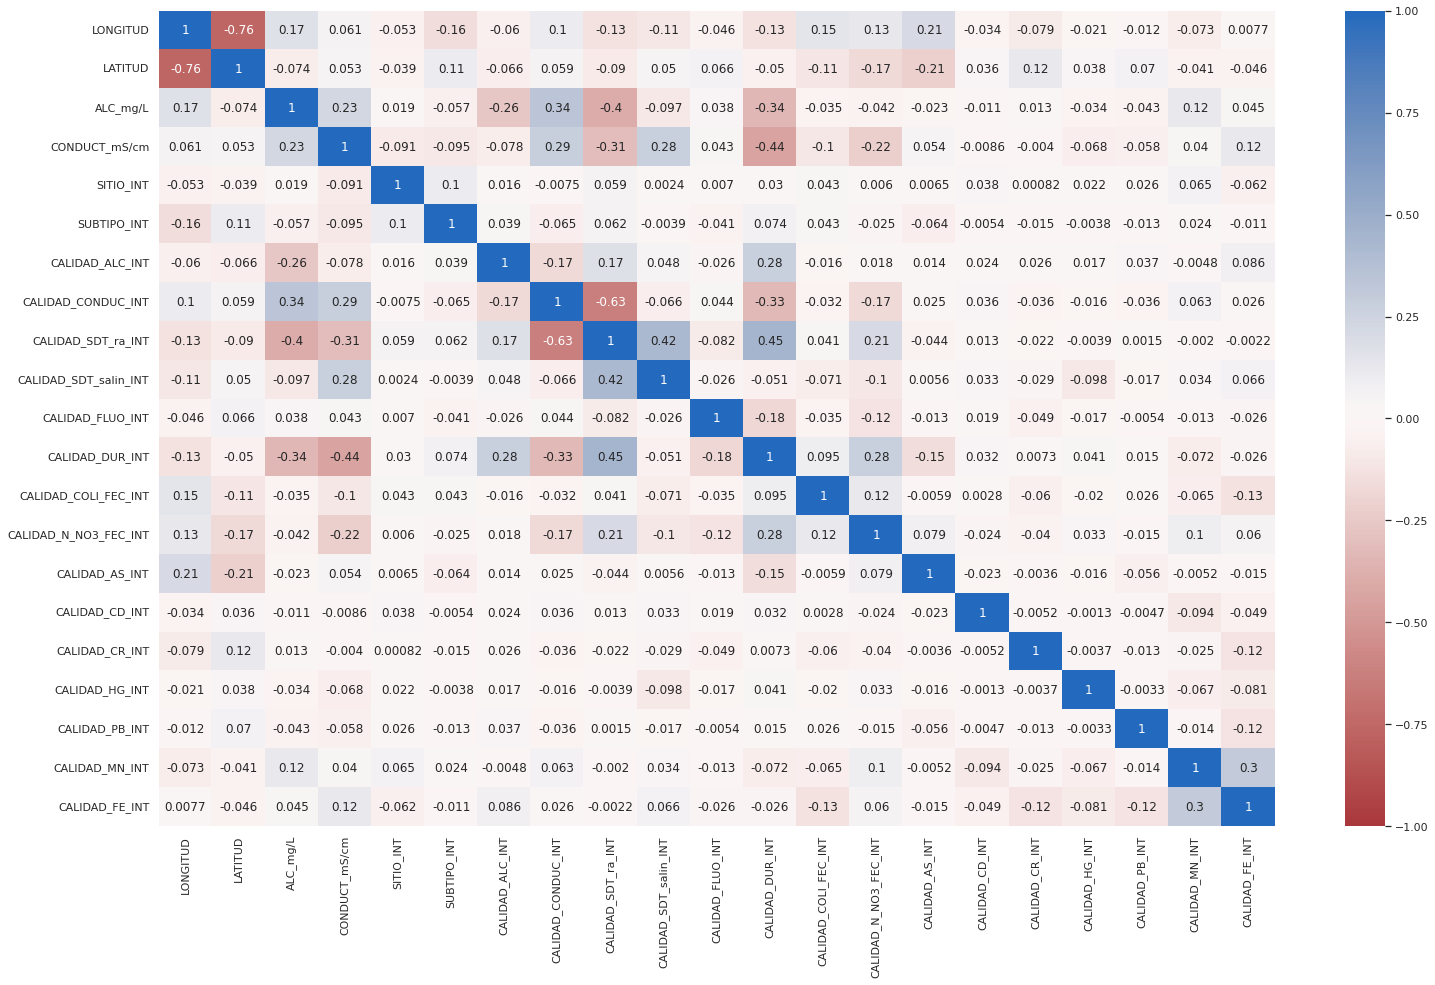

In [ ]:
sns.set(rc = {'figure.figsize':(25,15)}) 
sns.heatmap(df.corr(), annot = True, cmap = 'vlag_r', vmin = -1, vmax = 1)
plt.show()

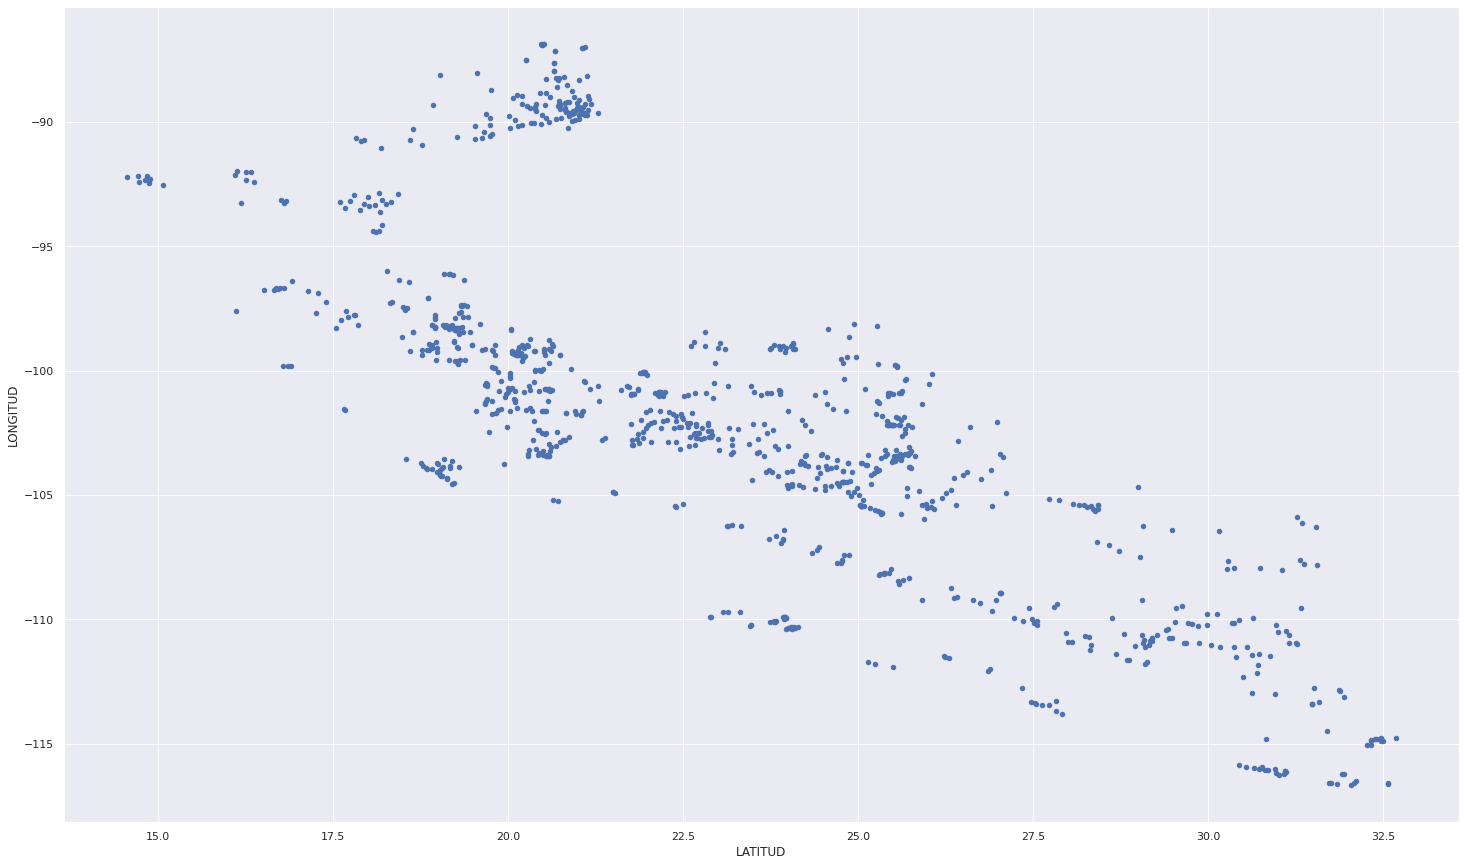

In [ ]:
df[['LATITUD', 'LONGITUD']].plot.scatter( "LATITUD","LONGITUD")

In [ ]:
df["Coordenadas"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordenadas"] = df["Coordenadas"].apply(Point)
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CALIDAD_COLI_FEC_INT,CALIDAD_N_NO3_FEC_INT,CALIDAD_AS_INT,CALIDAD_CD_INT,CALIDAD_CR_INT,CALIDAD_HG_INT,CALIDAD_PB_INT,CALIDAD_MN_INT,CALIDAD_FE_INT,Coordenadas
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,4,2,0,1,1,1,1,0,0,POINT (-102.0221 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,4,1,0,1,1,1,1,0,0,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,4,2,1,1,1,1,1,0,0,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,4,2,0,1,1,1,1,0,0,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,0,0,2,1,1,1,1,0,0,POINT (-110.2448 23.45138)


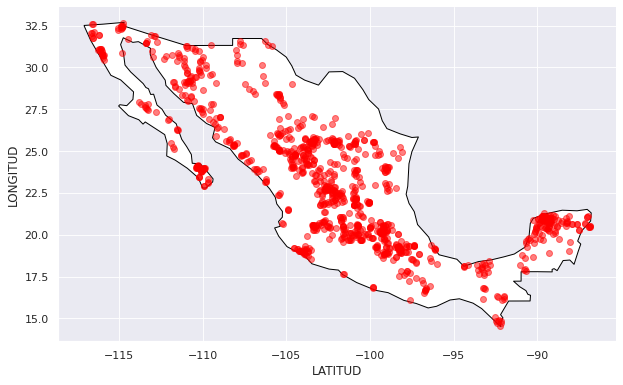

In [ ]:
puntos_en_mapa = gpd.GeoDataFrame(df, geometry="Coordenadas")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

puntos_en_mapa.plot(ax=gax, color='red', alpha = 0.5)
#puntos_en_mapa

##**Kmeans**

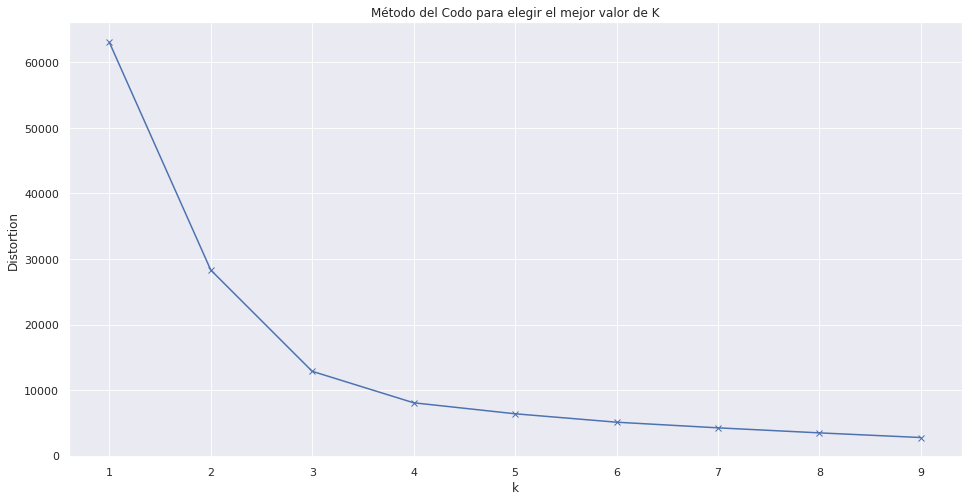

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[['LONGITUD',	'LATITUD']])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Método del Codo para elegir el mejor valor de K')
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(df[['LONGITUD',	'LATITUD']])
df['k_means']=kmeanModel.predict(df[['LONGITUD', 'LATITUD']]).astype(str)
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CALIDAD_N_NO3_FEC_INT,CALIDAD_AS_INT,CALIDAD_CD_INT,CALIDAD_CR_INT,CALIDAD_HG_INT,CALIDAD_PB_INT,CALIDAD_MN_INT,CALIDAD_FE_INT,Coordenadas,k_means
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,2,0,1,1,1,1,0,0,POINT (-102.02210 22.20887),1
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,1,0,1,1,1,1,0,0,POINT (-102.20075 21.99958),1
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,2,1,1,1,1,1,0,0,POINT (-102.28801 22.36685),2
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,2,0,1,1,1,1,0,0,POINT (-102.29449 22.18435),2
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,0,2,1,1,1,1,0,0,POINT (-110.24480 23.45138),0


In [ ]:
fig = px.scatter_geo(df, lon = 'LONGITUD', lat = 'LATITUD', color = 'k_means')
fig.update_geos(
    visible=False, resolution=110, #scope="north america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Black",
    fitbounds="locations"
)

fig.show()

In [ ]:
df.k_means.value_counts()

1    361
2    321
0    210
3    162
Name: k_means, dtype: int64

In [ ]:
centroids = kmeanModel.cluster_centers_
centroids = pd.DataFrame(centroids, columns = ['LONGITUD', 'LATITUD']).reset_index().rename(columns = {'index':'cluster'})
centroids['cluster'] = centroids.cluster.astype(str)
centroids

,cluster,LONGITUD,LATITUD
0,0,-111.262801,28.609425
1,1,-100.179832,20.169847
2,2,-103.447389,24.664864
3,3,-90.092716,19.650263


In [ ]:
fig = go.Figure()
for k in sorted(df.k_means.unique()):
  fig.add_trace(go.Scattergeo(
        lon = df[df.k_means == k].LONGITUD,
        lat = df[df.k_means == k].LATITUD,
        mode = 'markers',
        name = f'Cluster {k}' ,
        ))
fig.add_trace(go.Scattergeo(
        lon = centroids.LONGITUD,
        lat = centroids.LATITUD,
        mode = 'markers',
        name = 'Centroides',
        marker_color = 'Black',
        marker_size = 10
        ))
fig.update_geos(
    visible=False, resolution=110,
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Black",
    fitbounds="locations")
fig.show()

In [ ]:
for col in [i for i in df.columns if 'CALIDAD' in i][:15]:
  print(pd.DataFrame(df.groupby([col]).k_means.value_counts()).rename(columns = {'k_means':'Freq'}))
  print('\n')

                              Freq
CALIDAD_ALC          k_means      
Alta                 2         256
                     1         240
                     0         158
                     3         136
Baja                 1          10
                     2           6
                     3           4
                     0           3
Indeseable como FAAP 1          30
                     2          14
                     3           7
                     0           6
Media                1          81
                     2          45
                     0          43
                     3          15


                               Freq
CALIDAD_CONDUC        k_means      
Buena para riego      1         172
                      2         162
                      0          72
                      3          23
Dudosa para riego     2          23
                      3          23
                      0          14
                      1          12
Excelent

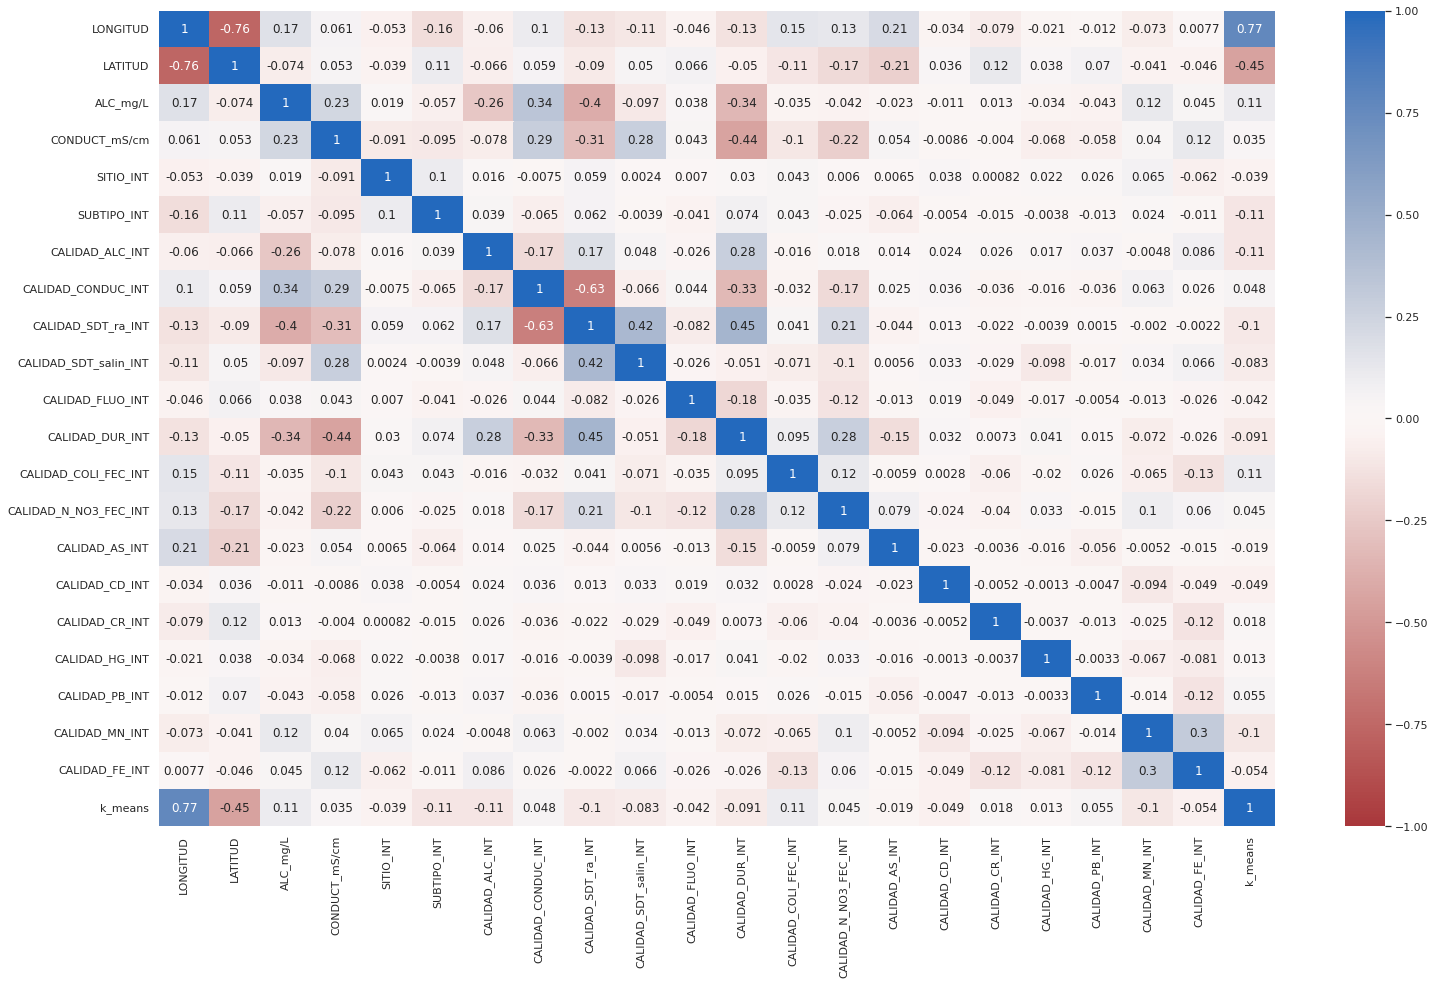

In [ ]:
df['k_means'] = df['k_means'].astype(int)
sns.set(rc = {'figure.figsize':(25,15)}) 
sns.heatmap(df.corr(), annot = True, cmap = 'vlag_r', vmin = -1, vmax = 1)
plt.show()

## **Conlusiones**

Del conjunto de nuestros datos quitamos las que tienen más datos perdidos o nulos como CONTAMINANTES', 'SDT_mg/L', asi también quitamos el 'PERIODO porque no nos interesa. En el caso de las demás variables identificamos los datos perdidos de las variables, luego imputamos las variables de tipo categorica con la moda, gráficamos el histograma con  box-plot de las variables ALC_mg/L' y CONDUCT_mS/cm, en el primer caso tenemos que se comporta de manera normal aunque tiene outliers, en el segundo presenta sesgo y además tiene más outliers. Generamos una matriz de correlación para ver la importancia de las variables y gráficamos los puntos para ubicarlos en un mapa. 

A través de elbow obtuvimos el número de cluster "k" a analizar, el resultado nos dió 4 y esos son los que usamos para aplicar Kmeans. 

La cantidad de puntos de cada cluster es la siguiente:
1    361
2    321
0    210
3    162

Usuamos kmeans para datos no supervisados, es decir, sin etiquetas, estos se clasifican de acuerdo a la estructura interna de los datos, que en este caso son las latitudes y longitudes del conjunto de datos. Cada uno de esos cluster contiene el número de puntos que de alguna manera tiene una distancia umbral. 

Finalmente, obtuvimos la frecuencia de cada una de las variables categoricas con respecto al cada cluster y observamos que  la CALIDAD_ALC en los cluster con más densidad de población es muy baja. 